<a href="https://colab.research.google.com/github/lazyenough/Oil_production/blob/main/volveOilPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the dataset
data = pd.read_excel('/content/Volve production data.xlsx', usecols = [0,9,10,11,12,13,15,16,17,18])

#gaining some insights of data
data.describe()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
count,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000
mean,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548
std,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000
50%,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000
75%,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000
max,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000


In [4]:
#checking for NULL/missing values in the data
print(data.isnull().sum())

# droping empty columns
x = data.dropna()
#droping inconsistent rows
x = x.loc[ 1000 : 7800]

#storing the label(Oil volume) in a variable
y = pd.DataFrame(x['BORE_OIL_VOL'])

#removing the label column from the dataset
x = x.drop(columns=['BORE_OIL_VOL'])


DATEPRD                        0
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
dtype: int64


In [5]:
#importing some more libraries reqiured
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pandas.core.common import random_state

In [6]:
#splitting the dataset into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state = 42)
x_train = x_train.drop(columns=['DATEPRD'])
x_testyear = x_test['DATEPRD']
x_test = x_test.drop(columns=['DATEPRD'])

#Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#Implementing polynomial regression on the dataset
poly_reg = PolynomialFeatures(degree = 3)
x_train_transformed = poly_reg.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_transformed, y_train)
x_test_transformed = poly_reg.fit_transform(x_test )
y_pred = model.predict(x_test_transformed)

print("R2 Score Polynomial regression : ",model.score(x_test_transformed, y_test))
print('MSE Polynomial regression : ', mean_squared_error(y_test, y_pred))
print('RMSE Polynomial regression : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE Polynomial regression : ',mean_absolute_error( y_test, y_pred))

R2 Score Polynomial regression :  0.9537379350076595
MSE Polynomial regression :  83956.06965138568
RMSE Polynomial regression :  289.7517379609408
MAE Polynomial regression :  164.4022966751629


Text(0.5, 1.0, 'Actual v/s Model prediction for Bore Oil Volume')

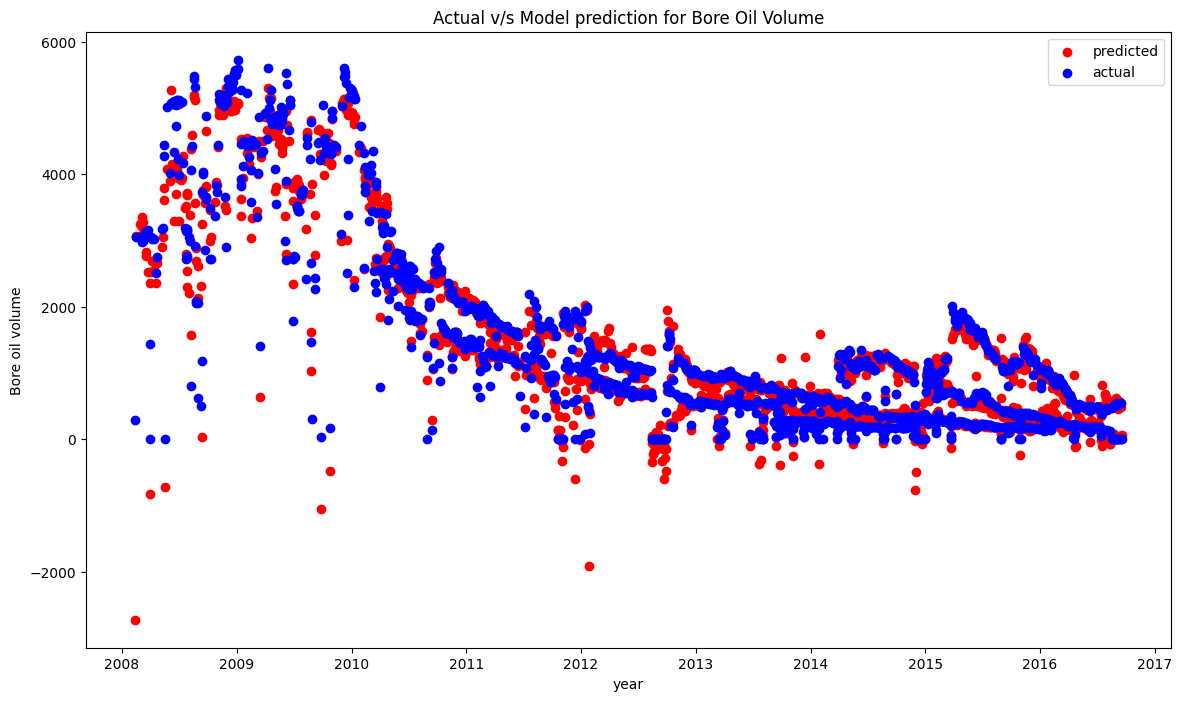

In [8]:
#Performance of the model representing graphically
# plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(x_testyear,y_pred,label='predicted', color = 'red')
plt.scatter(x_testyear,y_test,label='actual', color = 'blue')

plt.legend()
plt.xlabel("year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume')